# Markowitz

combinação de ativos com baixa correlação. Ele considera a aversão ao risco

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

/home/itamar/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/itamar/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [76]:
assets = ['MGLU3.SA','VVAR3.SA']
df = pd.DataFrame()

for a in assets:
    df[a] = web.DataReader(a,data_source='yahoo',start = '2010-1-1')['Adj Close']

In [77]:
df.tail()

,MGLU3.SA,VVAR3.SA
Date,,
2020-05-25,60.400002,11.21
2020-05-26,64.480003,11.57
2020-05-27,67.360001,12.18
2020-05-28,65.250000,12.58
2020-05-29,64.349998,12.40


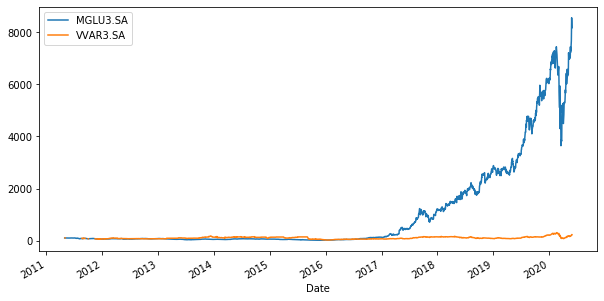

In [78]:
(df/df.iloc[0] *100).plot(figsize=(10,5))

In [79]:
log_returns = np.log(df/df.shift(1))

In [80]:
log_returns.mean()*250

MGLU3.SA    0.489520
VVAR3.SA    0.135459
dtype: float64

In [81]:
log_returns.cov() *250

,MGLU3.SA,VVAR3.SA
MGLU3.SA,0.376831,0.111749
VVAR3.SA,0.111749,0.528800


In [82]:
num_assets = len(assets)

In [83]:
arr = np.random.random(2)
arr

array([0.48765782, 0.21113658])

In [84]:
arr.sum()

0.6987944010074472

In [85]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.51048197, 0.48951803])

In [86]:
weights[0] + weights[1]

1.0

## Expect Portifolio Return

In [87]:
np.sum(weights * log_returns.mean()) * 250

0.316200788242172

## Expect Portifolio Variance

In [88]:
np.dot(weights.T,np.dot(log_returns.cov() *250,weights))

0.28076432511364946

Expected Portifolio Volatility

In [89]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250 , weights)))

0.5298719893650253

In [90]:
pf_returns = []
pf_volatilities = []

In [91]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pf_returns, pf_volatilities

([0.22315597067429144,
  0.26285787152198237,
  0.30083664125926574,
  0.48353000562908616,
  0.25863819366180224,
  0.4869273148525799,
  0.30425954754854323,
  0.3123746415109802,
  0.31081471661175236,
  0.2894887269398697,
  0.3536430059902367,
  0.3800450223179142,
  0.4210383563703022,
  0.24419150348911428,
  0.439723399684487,
  0.25066371634705104,
  0.35338775134133144,
  0.15293817402822077,
  0.21676640735739547,
  0.31029083218123793,
  0.3270291990647998,
  0.31038804943408266,
  0.484921877647045,
  0.2632824717909533,
  0.28965556849217394,
  0.38941467428384,
  0.25536738817154186,
  0.351972704627032,
  0.2944867309896023,
  0.3544862672500577,
  0.32355465478682155,
  0.15070905255238606,
  0.4243597705234334,
  0.31580173023926916,
  0.3772988755976161,
  0.14602620429870042,
  0.464330437050911,
  0.33766703174475415,
  0.4251899694509797,
  0.3907257798316383,
  0.34343917348382286,
  0.42385129203124305,
  0.29234730882348847,
  0.44439407015496823,
  0.357822955

In [92]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

pf_returns, pf_volatilities

(array([0.22315597, 0.26285787, 0.30083664, 0.48353001, 0.25863819,
        0.48692731, 0.30425955, 0.31237464, 0.31081472, 0.28948873,
        0.35364301, 0.38004502, 0.42103836, 0.2441915 , 0.4397234 ,
        0.25066372, 0.35338775, 0.15293817, 0.21676641, 0.31029083,
        0.3270292 , 0.31038805, 0.48492188, 0.26328247, 0.28965557,
        0.38941467, 0.25536739, 0.3519727 , 0.29448673, 0.35448627,
        0.32355465, 0.15070905, 0.42435977, 0.31580173, 0.37729888,
        0.1460262 , 0.46433044, 0.33766703, 0.42518997, 0.39072578,
        0.34343917, 0.42385129, 0.29234731, 0.44439407, 0.35782296,
        0.26028098, 0.24745391, 0.48597773, 0.21962745, 0.32075237,
        0.14214247, 0.23559978, 0.39048744, 0.26163037, 0.3355518 ,
        0.32287231, 0.27222451, 0.26904948, 0.40966726, 0.25511724,
        0.35571213, 0.21612908, 0.31640026, 0.29886691, 0.15384014,
        0.31419728, 0.40863253, 0.17216034, 0.16973188, 0.18760292,
        0.43466348, 0.32715918, 0.289171  , 0.26

In [93]:
portfolios = pd.DataFrame({'Return': pf_returns, 'Volatility': pf_volatilities})

In [94]:
portfolios.head()

,Return,Volatility
0,0.223156,0.603366
1,0.262858,0.563018
2,0.300837,0.536678
3,0.483530,0.606677
4,0.258638,0.566724


Text(0, 0.5, 'Expected Return')

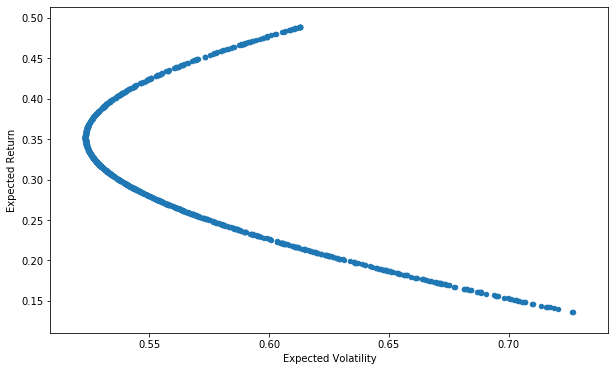

In [95]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')